<a href="https://colab.research.google.com/github/anudeepreddyv/cs480student/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [34]:
# load numpy and matplotlib
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [35]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [36]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [37]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.
!wget https://cs480.org/data/xray.zip

--2022-04-05 00:59:08--  https://cs480.org/data/xray.zip
Resolving cs480.org (cs480.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to cs480.org (cs480.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64445812 (61M) [application/zip]
Saving to: ‘xray.zip.1’

xray.zip.1          100%[===================>]  61.46M   210MB/s    in 0.3s    

2022-04-05 00:59:08 (210 MB/s) - ‘xray.zip.1’ saved [64445812/64445812]



In [38]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [39]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

(1858, 2090)


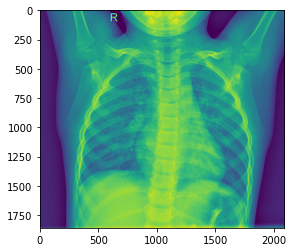

In [40]:
# TODO: Please display this image and print the dimensions!
plt.figure()
plt.imshow(img)
print(img.shape)

In [41]:
# TODO: YOUR CODE

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [42]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [43]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [44]:
normal_images.shape, pneumonia_images.shape

((100, 300, 300), (100, 300, 300))

# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) **Resizing the image**
# TODO: Operation 2) **Data Gathering**

In [45]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [46]:
# TODO: YOUR CODE

def display(img):
  plt.figure()
  plt.imshow(img)

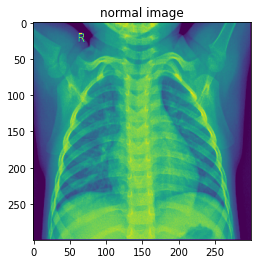

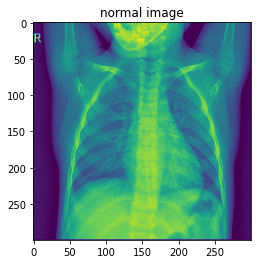

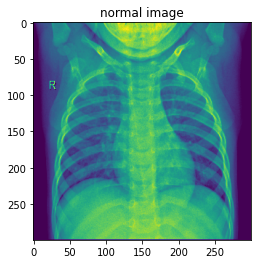

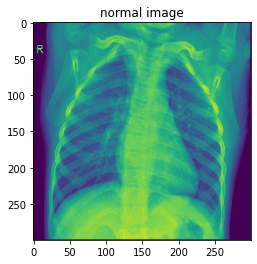

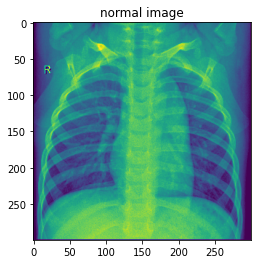

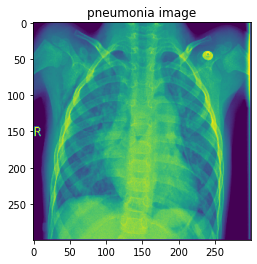

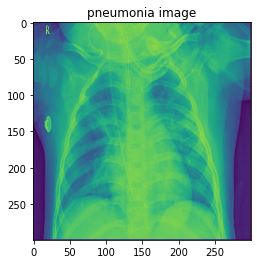

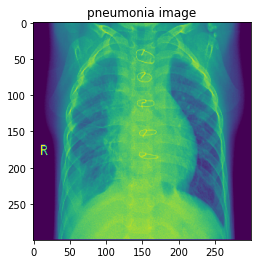

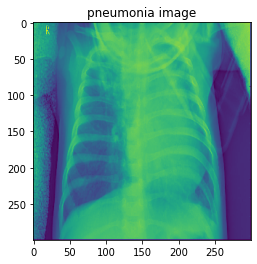

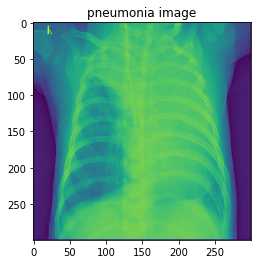

In [47]:
for i in range(0,5):
  display(normal_images[i])
  plt.title("normal image")
for i in range(0,5):
  display(pneumonia_images[i])
  plt.title("pneumonia image")

**Task 3:** Setup training and testing data. [15 Points]

In [48]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [49]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [50]:
training_data.shape

(120, 90000)

In [51]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = [0]*TRAINING_COUNT + [1]*TRAINING_COUNT

In [52]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [53]:
testing_data.shape

(80, 90000)

In [54]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = [0]*TESTING_COUNT + [1]*TESTING_COUNT

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [55]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [56]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

# TODO: In just a few sentences, please explain how the Random Forest works.

# Random Forest is an ensemble learning method. Random Forest is used to reduce the variance. Each of the base model may have low bias, high variance. But when combined the variance reduces.


In [57]:
# TODO: YOUR ANSWER

In [58]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.95

In [59]:
# TODO: Is the classification accuracy good? And, are you surprised?

# TODO: With the data available on hand, 91% accuracy is pretty good. I was surprised by the classification power of Random Forest.

**Bonus:** Let's take a closer look! [33 Points]

In [60]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

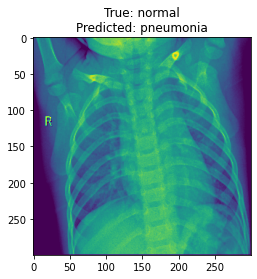

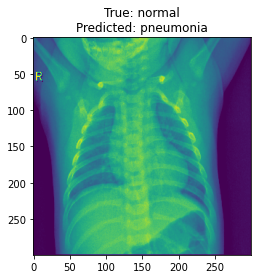

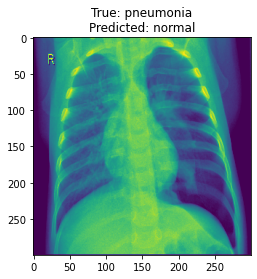

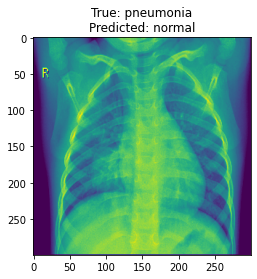

In [61]:
# TODO: YOUR CODE AND YOUR ANSWER
y_pred = clf.predict(testing_data)
misclassifications = []
for index, ij in enumerate(zip(testing_target, y_pred)):
  i, j = ij
  labels = []
  if i == 0:
    labels.append("normal")
  else:
    labels.append("pneumonia")
  if j == 0:
    labels.append("normal")
  else:
    labels.append("pneumonia")
  if i != j:
    misclassifications.append([index, labels])


for index, labels in misclassifications:
  img = testing_data[index]
  img = img.reshape(300, 300)
  display(img)
  plt.title("True: " +str(labels[0])+"\nPredicted: "+str(labels[1]))

# In normal images, yellow color dominates whereas in pneumonia yellow doesn't.

In [62]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

# We can use more data to improve accuracy.
# We can do hyperparameter tuning to improve the accuracy.

In [63]:
# Great job!!! 
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw





# In collaboration with Sai Deepthi Maganti